<a href="https://colab.research.google.com/github/githubdcw/electromagnetics-X/blob/main/numerical/1d_numerical_integration_example.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

หาความยาวของเส้นโค้ง $y=x^2$ เมื่อ $0<x<1$  
$\Delta l_i = \sqrt{\Delta x_i ^2 +\Delta y_i ^2}$  
$l = \sum_{i=1}^{i=N}{\sqrt{\Delta x_i ^2 +\Delta y_i ^2}}$  
ถ้าแบ่งให้เป็นชิ้นที่เล็กที่สุดที่จะเล็กได้  
$\Delta x \rightarrow dx$  
$\Delta y \rightarrow dy$  
$\sum_{i=1}^{i=N} \rightarrow \sum_{i=1}^{i=N\rightarrow \infty} \rightarrow \int_{x=0}^{x=1}$  
$l = \int_{x=0}^{x=1}{\sqrt{d x ^2 +d y ^2}}$  
$y=x^2 \rightarrow dy=2xdx $  
$l = \int_{x=0}^{x=1}{\sqrt{d x ^2 +(2xd x) ^2}}$  
$l = \int_{x=0}^{x=1}{\sqrt{1 +4x ^2}d x} = 1.478942857544597$ using https://www.integral-calculator.com/  



หาความยาวด้วยสมาการ (numerical integration)  
$l = \sum_{i=1}^{i=N}{\sqrt{\Delta x_i ^2 +\Delta y_i ^2}}$  
แบ่ง $0<x<1$ เป็น $N$ ชิ้น แต่ละชื้อมีความยาวเป็น `dx = 1/N`  
สร้างตัวแปรเก็บจุดกึ่งกลางของแต่ชิ้นด้วย `xx = dx*np.array(range(N))+dx/2`  







In [ ]:
import numpy as np
N = 10
dx = 1/N
xx = dx*np.array(range(N))+dx/2
print(xx)

[0.05 0.15 0.25 0.35 0.45 0.55 0.65 0.75 0.85 0.95]


`yy1 = (xx-dx/2)**2` คือตำแหน่งเริ่มต้นของแต่ละชิ้น  
`yy2 = (xx+dx/2)**2` คือตำแหน่งสุดของแต่ละชิ้น  
ระยะการเปลี่ยนแปลงทางแกน $y$ ของแต่ละชิ้นคือ `dy=yy2-yy1`

In [ ]:
yy1 = (xx-dx/2)**2
yy2 = (xx+dx/2)**2
dy = yy2-yy1
print(dy)

[0.01 0.03 0.05 0.07 0.09 0.11 0.13 0.15 0.17 0.19]


`dl` คือความยาวของแต่ละชิ้น  

In [ ]:
dl = (dx**2+dy**2)**0.5
print(dl)
l = sum(dl)
print(l)

[0.10049876 0.10440307 0.1118034  0.12206556 0.13453624 0.14866069
 0.16401219 0.18027756 0.19723083 0.21470911]
1.4781973974873293


รวมโปรแกรม  
ให้ $1<N<20$  

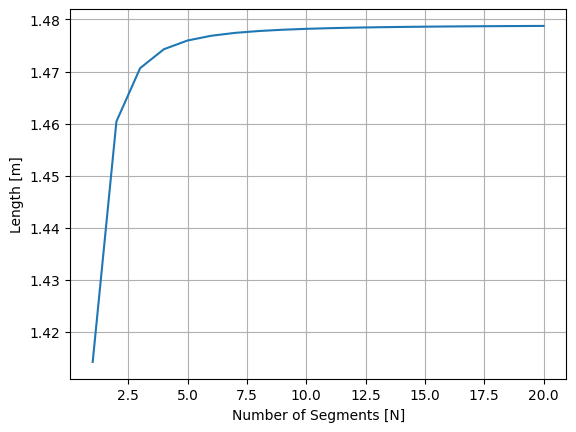

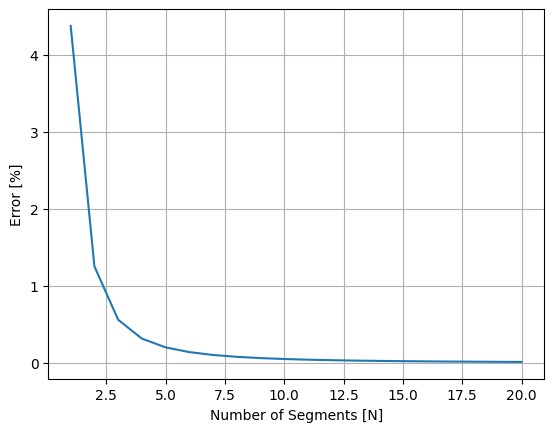

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
NN = []
ll = []
for N in range(1,21):
  NN.append(N)
  dx = 1/N
  xx = dx*np.array(range(N))+dx/2
  # print(xx)
  yy1 = (xx-dx/2)**2
  yy2 = (xx+dx/2)**2
  dy = yy2-yy1
  # print(dy)
  dl = (dx**2+dy**2)**0.5
  # print(dl)
  ll.append(sum(dl))
  # print(l)
plt.plot(NN,ll)
plt.xlabel('Number of Segments [N]')
plt.ylabel('Length [m]')
plt.grid()
plt.show()
l_exact = 1.478942857544597
error = np.abs((np.array(ll)-l_exact)*100/l_exact)
plt.plot(NN,error)
plt.xlabel('Number of Segments [N]')
plt.ylabel('Error [%]')
plt.grid()
plt.show()

